In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from textblob import TextBlob
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import re
from dateutil import parser
import dataparser
from datetime import datetime
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [3]:
stop_words = set(stopwords.words("english"))

In [4]:
data = pd.read_csv('KFCReviews.csv')
print ("Original 'KFCReviews.csv' CSV Data: \n")
data

Original 'KFCReviews.csv' CSV Data: 



,Review,Like,Haha,Angry,Date
0,Absolutely terrible service never get anything...,2,0,0,10 hrs
1,What a terrible store in Layton Utah. Ordered ...,0,0,0,9 hrs
2,I love working at KFC. Great employees and gre...,0,0,0,26 December 2021 at 11:52
3,the kfc in Winchester va on fox drive is the w...,0,0,0,1 January at 16:13
4,Their app is terrible their customer service i...,1,0,0,23 December 2021 at 08:56
5,This is the most trashy KFC I’ve ever visited....,0,0,0,28 December 2021 at 19:36
6,More KFC #reels #Viral #kfc #trending #tiktok,0,0,0,29 December 2021 at 15:38
7,NASTY cold burnt chicken employees cant count ...,1,0,0,24 December 2021 at 08:19
8,Poor service overall ..poor work ethics...poor...,0,0,0,23 December 2021 at 09:42
9,Terrible customer service in Watertown NY. The...,2,0,0,22 December 2021 at 12:36


In [5]:
# contraction expansion 
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [6]:
column_name1 = "Like"
like_sum = data["Like"].sum()
like_sum

42

In [7]:
column_name1 = "Haha"
Haha_sum = data["Haha"].sum()
Haha_sum

1

In [8]:
column_name1 = "Angry"
angry_sum = data["Angry"].sum()
angry_sum

1

In [9]:
angry = 0
for i in data["Angry"]:
    angry = angry + i

In [10]:
haha = 0
for i in data["Haha"]:
    haha = haha + i

In [11]:
likes = 0
for i in data["Like"]:
    likes = likes + i

Text(0, 0.5, 'Number of reactions')

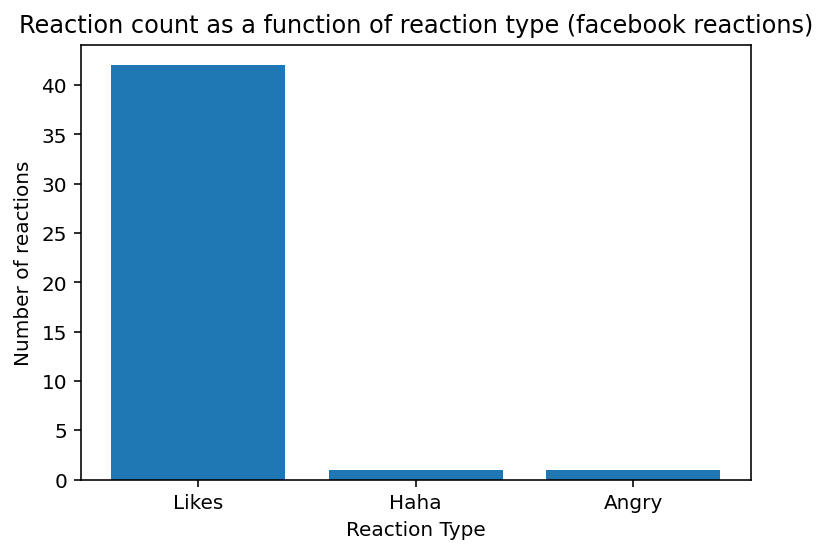

In [12]:
vals = [likes, haha, angry]
inds=range(len(vals))
labels=["Likes", "Haha", "Angry"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('Reaction count as a function of reaction type (facebook reactions)')
plt.xlabel('Reaction Type')
plt.ylabel('Number of reactions')

In [13]:
from csv import reader

outfile = open("KFCReviews1.txt", "w")
with open('KFCReviews.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['Review'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

Absolutely terrible service never get anything you order food quality isn’t the best unfriendly staff wouldn’t recommend this place
What a terrible store in Layton Utah. Ordered a meal on the KFC Website for delivery. Order arrived and left by door dash. Upon inspection I was missing an entire bucket of chicken! When I called the store they said they couldn't do much with online orders and sent me to a 800# where I was on hold for 13 minutes for a partial refund. What a joke.
I love working at KFC. Great employees and great customers. It’s a great place to work
the kfc in Winchester va on fox drive is the worst place I have ever tried to get food from. every time I go there they never have any food available and the workers have horrible customer service. I made an online order. I went and tried to pick up my order. they specifically said we don't have your order available cause we don't have any chicken in stock. and then the manager refuse to refund my money when they didn't even hav

In [14]:
comments = []
with open ("KFCReviews.csv", "r", encoding ='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['Review', 'Like', 'Haha', 'Angry', 'Date']
['Absolutely terrible service never get anything you order food quality isn’t the best unfriendly staff wouldn’t recommend this place', '2', ' 0', ' 0', '10 hrs']
["What a terrible store in Layton Utah. Ordered a meal on the KFC Website for delivery. Order arrived and left by door dash. Upon inspection I was missing an entire bucket of chicken! When I called the store they said they couldn't do much with online orders and sent me to a 800# where I was on hold for 13 minutes for a partial refund. What a joke.", '0', ' 0', ' 0', '9 hrs']
['I love working at KFC. Great employees and great customers. It’s a great place to work', '0', ' 0', ' 0', '26 December 2021 at 11:52']
["the kfc in Winchester va on fox drive is the worst place I have ever tried to get food from. every time I go there they never have any food available and the workers have horrible customer service. I made an online order. I went and tried to pick up my order. they specifical

In [15]:
del comments[0]
comments

[['Absolutely terrible service never get anything you order food quality isn’t the best unfriendly staff wouldn’t recommend this place',
  '2',
  ' 0',
  ' 0',
  '10 hrs'],
 ["What a terrible store in Layton Utah. Ordered a meal on the KFC Website for delivery. Order arrived and left by door dash. Upon inspection I was missing an entire bucket of chicken! When I called the store they said they couldn't do much with online orders and sent me to a 800# where I was on hold for 13 minutes for a partial refund. What a joke.",
  '0',
  ' 0',
  ' 0',
  '9 hrs'],
 ['I love working at KFC. Great employees and great customers. It’s a great place to work',
  '0',
  ' 0',
  ' 0',
  '26 December 2021 at 11:52'],
 ["the kfc in Winchester va on fox drive is the worst place I have ever tried to get food from. every time I go there they never have any food available and the workers have horrible customer service. I made an online order. I went and tried to pick up my order. they specifically said we do

In [16]:
review = comments[1][0].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

what a terrible store in layton utah. ordered a meal on the kfc website for delivery. order arrived and left by door dash. upon inspection i was missing an entire bucket of chicken! when i called the store they said they couldn't do much with online orders and sent me to a 800# where i was on hold for 13 minutes for a partial refund. what a joke.
Sentiment(polarity=-0.2642857142857143, subjectivity=0.44642857142857145)


In [17]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

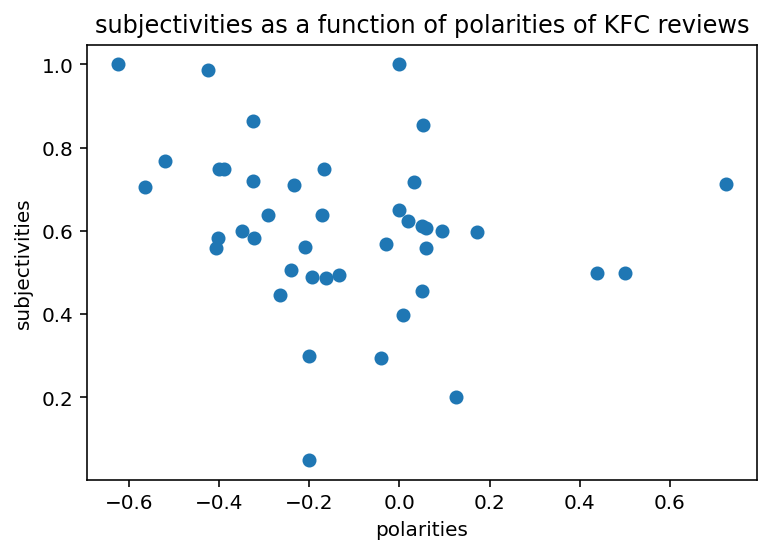

In [18]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of KFC reviews")
plt.show

In [19]:
data ["Subjectivity"] = subjectivities 
data ["Polarity"] = polarities
full_data = data
full_data

,Review,Like,Haha,Angry,Date,Subjectivity,Polarity
0,Absolutely terrible service never get anything...,2,0,0,10 hrs,0.650000,0.000000
1,What a terrible store in Layton Utah. Ordered ...,0,0,0,9 hrs,0.446429,-0.264286
2,I love working at KFC. Great employees and gre...,0,0,0,26 December 2021 at 11:52,0.712500,0.725000
3,the kfc in Winchester va on fox drive is the w...,0,0,0,1 January at 16:13,0.750000,-0.390000
4,Their app is terrible their customer service i...,1,0,0,23 December 2021 at 08:56,0.854167,0.052083
5,This is the most trashy KFC I’ve ever visited....,0,0,0,28 December 2021 at 19:36,0.611111,0.050000
6,More KFC #reels #Viral #kfc #trending #tiktok,0,0,0,29 December 2021 at 15:38,0.500000,0.500000
7,NASTY cold burnt chicken employees cant count ...,1,0,0,24 December 2021 at 08:19,0.987500,-0.425000
8,Poor service overall ..poor work ethics...poor...,0,0,0,23 December 2021 at 09:42,0.300000,-0.200000
9,Terrible customer service in Watertown NY. The...,2,0,0,22 December 2021 at 12:36,0.506463,-0.240816


In [20]:
data ['Score'] = data['Subjectivity'] * data['Polarity']
data ['Client'] = "KFC"
#data['word_count'].drop()
full_data = data
full_data

,Review,Like,Haha,Angry,Date,Subjectivity,Polarity,Score,Client
0,Absolutely terrible service never get anything...,2,0,0,10 hrs,0.650000,0.000000,0.000000,KFC
1,What a terrible store in Layton Utah. Ordered ...,0,0,0,9 hrs,0.446429,-0.264286,-0.117985,KFC
2,I love working at KFC. Great employees and gre...,0,0,0,26 December 2021 at 11:52,0.712500,0.725000,0.516563,KFC
3,the kfc in Winchester va on fox drive is the w...,0,0,0,1 January at 16:13,0.750000,-0.390000,-0.292500,KFC
4,Their app is terrible their customer service i...,1,0,0,23 December 2021 at 08:56,0.854167,0.052083,0.044488,KFC
5,This is the most trashy KFC I’ve ever visited....,0,0,0,28 December 2021 at 19:36,0.611111,0.050000,0.030556,KFC
6,More KFC #reels #Viral #kfc #trending #tiktok,0,0,0,29 December 2021 at 15:38,0.500000,0.500000,0.250000,KFC
7,NASTY cold burnt chicken employees cant count ...,1,0,0,24 December 2021 at 08:19,0.987500,-0.425000,-0.419688,KFC
8,Poor service overall ..poor work ethics...poor...,0,0,0,23 December 2021 at 09:42,0.300000,-0.200000,-0.060000,KFC
9,Terrible customer service in Watertown NY. The...,2,0,0,22 December 2021 at 12:36,0.506463,-0.240816,-0.121964,KFC


In [21]:
pol_mean = full_data['Polarity'].mean()
sub_mean = full_data['Subjectivity'].mean()
print ("average polarity is:")
print(pol_mean)
print ("average subjectvitiy is:")
print (sub_mean)

average polarity is:
-0.12390709839731955
average subjectvitiy is:
0.6045976942243948


In [22]:
full_data.to_csv('KFCFinal.csv', index=False)

In [23]:
# to lower case
full_data['Review'] = full_data['Review'].apply(lambda x: str(x).lower())
# expanding contracted words
full_data['Review'] = full_data['Review'].apply(lambda x: cont_to_exp(x))
# remove puntuation and special characters
full_data['Review'] = full_data['Review'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#remove stopwords 
full_data['Review'] = full_data['Review'].apply(lambda x: ' '.join([t for t in x.split() if t not in stop_words]))
data
# word count and stop word count 
#data['word_count'] = data['Review'].apply(lambda x : len(str(x).split()))
#data['stop_words_len'] = data['Review'].apply(lambda x: len([t for t in x.split() if t in stop_words]))

,Review,Like,Haha,Angry,Date,Subjectivity,Polarity,Score,Client
0,absolutely terrible service never get anything...,2,0,0,10 hrs,0.650000,0.000000,0.000000,KFC
1,terrible store layton utah ordered meal kfc we...,0,0,0,9 hrs,0.446429,-0.264286,-0.117985,KFC
2,love working kfc great employees great custome...,0,0,0,26 December 2021 at 11:52,0.712500,0.725000,0.516563,KFC
3,kfc winchester va fox drive worst place ever t...,0,0,0,1 January at 16:13,0.750000,-0.390000,-0.292500,KFC
4,app terrible customer service nonexistent mone...,1,0,0,23 December 2021 at 08:56,0.854167,0.052083,0.044488,KFC
5,trashy kfc ive ever visited look pictures chic...,0,0,0,28 December 2021 at 19:36,0.611111,0.050000,0.030556,KFC
6,kfc reels viral kfc trending tiktok,0,0,0,29 December 2021 at 15:38,0.500000,0.500000,0.250000,KFC
7,nasty cold burnt chicken employees cant count ...,1,0,0,24 December 2021 at 08:19,0.987500,-0.425000,-0.419688,KFC
8,poor service overall poor work ethicspoor cust...,0,0,0,23 December 2021 at 09:42,0.300000,-0.200000,-0.060000,KFC
9,terrible customer service watertown ny doors l...,2,0,0,22 December 2021 at 12:36,0.506463,-0.240816,-0.121964,KFC


In [24]:
comments = []
for row in data['Review']:
    comments.append(row)
    print (row)

absolutely terrible service never get anything order food quality isnt best unfriendly staff wouldnt recommend place
terrible store layton utah ordered meal kfc website delivery order arrived left door dash upon inspection missing entire bucket chicken called store said could much online orders sent 800 hold 13 minutes partial refund joke
love working kfc great employees great customers great place work
kfc winchester va fox drive worst place ever tried get food every time go never food available workers horrible customer service made online order went tried pick order specifically said order available cause chicken stock manager refuse refund money even food
app terrible customer service nonexistent money provide decent meal called 1 800 number answer waiting get sent voice mail great customer service
trashy kfc ive ever visited look pictures chicken clearly burned theyrefuse answer phone please drive pass
kfc reels viral kfc trending tiktok
nasty cold burnt chicken employees cant cou

In [25]:
tb = str(comments)

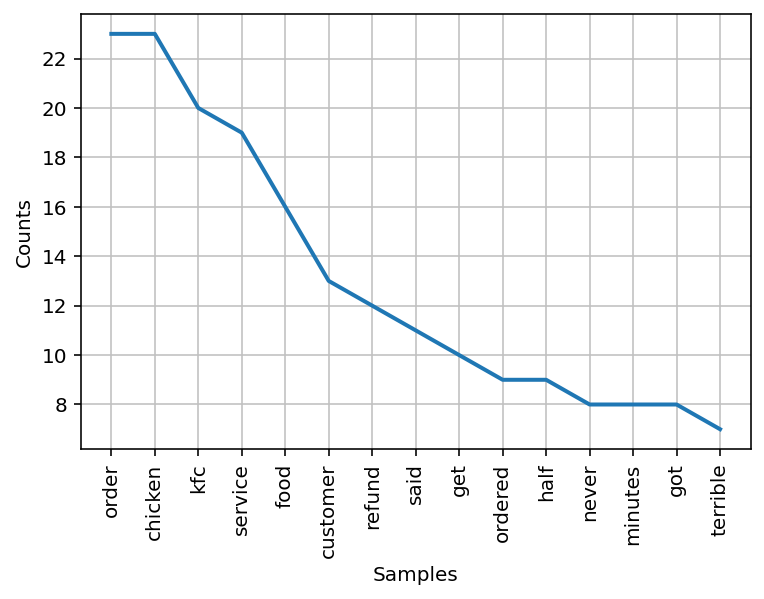

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
list1 = TextBlob(tb).word_counts
fw_fd = nltk.FreqDist(list1)
fw_fd.plot(15, cumulative=False)